<a href="https://colab.research.google.com/github/siphemkngwn/The-2024-Pediatric-Sepsis-Challenge/blob/patch-1/Copy_of_p21_AUC_79_theres_a_logistic_regression_at_the_bottom_that_works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Make sure this line is in your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Make sure this line is in your imports
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
url='https://raw.githubusercontent.com/Kamaleswaran-Lab/The-2024-Pediatric-Sepsis-Challenge/refs/heads/main/SyntheticData_Training.csv'
df=pd.read_csv(url)


1.26.4


In [ ]:
print(sns.__version__)

0.13.2


**Subsetting**

In [ ]:
df=df.dropna(subset=['momagefirstpreg_adm'])

In [ ]:
age_bins=[0,12,36,60,np.inf] # Use np.inf to represent infinity
age_labels=['infant','toddler','preschool','schoolgoing']
df['agecat']=pd.cut(df['agecalc_adm'],bins=age_bins,labels=age_labels)

In [ ]:
sc=['height_cm_adm','muac_mm_adm','agecalc_adm','glucose_mmolpl_adm','lengthadm','rr_brpm_app_adm','weight_kg_adm','diasbp_mmhg_adm','sqi1_perc_oxi_adm','bcsverbal_adm','temp_c_adm','lactate_mmolpl_adm','hematocrit_gpdl_adm','bcsmotor_adm','sysbp_mmhg_adm','inhospital_mortality','agecat']

In [ ]:
df=df[sc]

In [ ]:
muac_bins=[0,115,125,np.inf]
muac_labels=['sam','mam','normal']
df['muac_cat']=pd.cut(df['muac_mm_adm'],bins=muac_bins,labels=muac_labels)

In [ ]:
LabelEncoder()
le=LabelEncoder()

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'inhospital_mortality'] # Exclude target variable

In [ ]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df['agecat']=le.fit_transform(df['agecat'])

In [ ]:
df.head()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
0,79.8,150.0,16.8,4.8,2,23.0,11.6,54.0,98.0,0,36.3,2.2,38.0,0,92.0,0,3,1
1,93.0,151.0,46.1,7.2,5,35.0,13.6,42.0,99.0,0,36.8,2.7,42.0,0,72.0,0,1,1
2,68.2,148.0,7.9,5.0,4,56.0,8.2,51.0,98.0,0,37.2,2.9,40.0,0,94.0,0,0,1
3,95.0,138.0,38.2,11.7,5,38.0,12.0,57.0,99.0,0,37.6,NaN,NaN,0,94.0,0,1,1
4,83.0,165.0,16.1,5.8,7,61.0,12.0,73.0,96.0,0,38.7,4.4,42.0,0,107.0,0,3,1


In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='median')

In [ ]:
df['agecat'] = le.fit_transform(df['agecat'])

df['bcsmotor_adm']=le.fit_transform(df['bcsmotor_adm'])
df['hematocrit_gpdl_adm']=le.fit_transform(df['hematocrit_gpdl_adm'])
df['bcsverbal_adm']=le.fit_transform(df['bcsverbal_adm'])

In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [ ]:
x.head()
x.info()
print(x.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 2462 entries, 0 to 2685
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height_cm_adm        2451 non-null   float64
 1   muac_mm_adm          2451 non-null   float64
 2   agecalc_adm          2462 non-null   float64
 3   glucose_mmolpl_adm   2454 non-null   float64
 4   lengthadm            2462 non-null   int64  
 5   rr_brpm_app_adm      2458 non-null   float64
 6   weight_kg_adm        2455 non-null   float64
 7   diasbp_mmhg_adm      2462 non-null   float64
 8   sqi1_perc_oxi_adm    2344 non-null   float64
 9   bcsverbal_adm        2462 non-null   int64  
 10  temp_c_adm           2462 non-null   float64
 11  lactate_mmolpl_adm   2047 non-null   float64
 12  hematocrit_gpdl_adm  2462 non-null   int64  
 13  bcsmotor_adm         2462 non-null   int64  
 14  sysbp_mmhg_adm       2460 non-null   float64
 15  agecat               2462 non-null   int64 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

#scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x_train)
StandardScaler()
x_train=scaler.fit_transform(x_train)
scaler.transform(x_test)
x_train_scaled=scaler.transform(x_train)
x=x_train_scaled

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9553752535496958


In [ ]:
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.0


In [ ]:
y_pred = rf_classifier.predict_proba(x_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
y_pred = rf_classifier.predict_proba(x_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Print the AUC
print(f"AUC: {auc}")

AUC: 0.4301775718973171


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#Choosing **K** **features**

In [ ]:
importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Select the top k features (e.g., top 10)
k = 12  # Number of top features to select
top_features = feature_importances.head(k)['Feature'].tolist()

# Print the top features
print(f"Top {k} features:")
for feature in top_features:
    print(feature)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

#K more automatic subset

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# ... (Your existing code, including imports, data loading, and creating x and y) ...

# Feature Selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)  # Fit on the features (x) and target (y)

# Get feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)

# Select the top k features
k = 30  # Choose your desired value for k
top_k_features = feat_importances.nlargest(k).index

# Create a list of columns to keep, including the target variable
columns_to_keep = list(top_k_features) + ['inhospital_mortality']
print(columns_to_keep)

# Subset the DataFrame
df = df[columns_to_keep]
print(df.head())


ValueError: Found input variables with inconsistent numbers of samples: [1969, 2462]

In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

#Modeling with adjustive k

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed


In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9533468559837728


In [ ]:
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.0


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")


Specificity: 0.9978768577494692


#roc with the k features

In [ ]:


# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)


# Calculate AUC


# Print the AUC
print(f"AUC: {auc}")

AUC: 0.4301775718973171


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

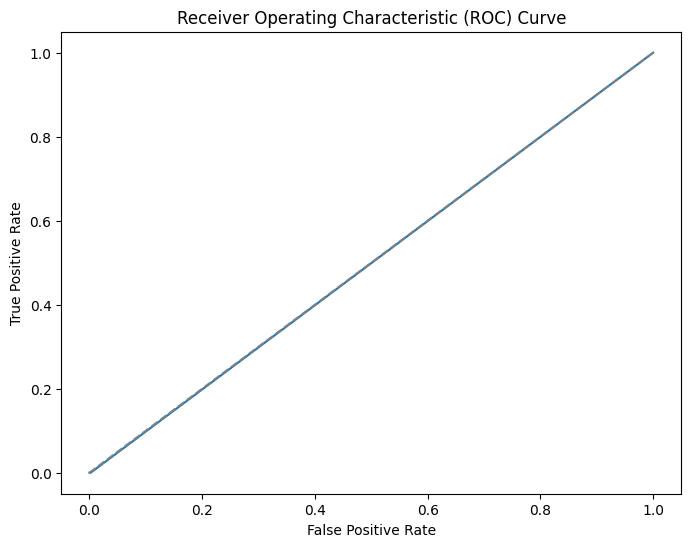

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")

**Subsetting DF real** ***bold text***

#**Subsetting** **DF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature data and 'y' is the target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
selected_columns = ['inhospital_mortality','height_cm_adm','weight_kg_adm','glucose_mmolpl_adm','hr_bpm_adm','hematocrit_gpdl_adm','lactate_mmolpl_adm','temp_c_adm','spo2site1_pc_oxi_adm','bcsverbal_adm','bcsmotor_adm','agecat']

In [ ]:
selected_columns = df

In [ ]:
df.head()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
0,79.8,150.0,16.8,4.8,2,23.0,11.6,54.0,98.0,0,36.3,2.2,31,0,92.0,0,3,1
1,93.0,151.0,46.1,7.2,5,35.0,13.6,42.0,99.0,0,36.8,2.7,35,0,72.0,0,1,1
2,68.2,148.0,7.9,5.0,4,56.0,8.2,51.0,98.0,0,37.2,2.9,33,0,94.0,0,0,1
3,95.0,138.0,38.2,11.7,5,38.0,12.0,57.0,99.0,0,37.6,NaN,55,0,94.0,0,1,1
4,83.0,165.0,16.1,5.8,7,61.0,12.0,73.0,96.0,0,38.7,4.4,35,0,107.0,0,3,1


In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [ ]:
x=selected_columns

In [ ]:
y=df['inhospital_mortality']

# New Section

In [ ]:
df.head()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
0,79.8,150.0,16.8,4.8,2,23.0,11.6,54.0,98.0,0,36.3,2.2,31,0,92.0,0,3,1
1,93.0,151.0,46.1,7.2,5,35.0,13.6,42.0,99.0,0,36.8,2.7,35,0,72.0,0,1,1
2,68.2,148.0,7.9,5.0,4,56.0,8.2,51.0,98.0,0,37.2,2.9,33,0,94.0,0,0,1
3,95.0,138.0,38.2,11.7,5,38.0,12.0,57.0,99.0,0,37.6,NaN,55,0,94.0,0,1,1
4,83.0,165.0,16.1,5.8,7,61.0,12.0,73.0,96.0,0,38.7,4.4,35,0,107.0,0,3,1


#Nan counts

In [ ]:
columns_to_drop=['spo2other_adm','lactate2_mmolpl_adm','vaccmeaslessource_adm']

In [ ]:
df=df.dropna(subset=['lactate_mmolpl_adm'])

In [ ]:
df=df.dropna(subset=['hematocrit_gpdl_adm'])

In [ ]:
df=df.dropna(subset=['momageknown_adm'])

KeyError: ['momageknown_adm']

In [ ]:
df=df.dropna(subset=['glucose_mmolpl_adm'])

In [ ]:
df=df.dropna(subset=['height_cm_adm'])

In [ ]:
df=df.dropna(subset=['weight_kg_adm'])

In [ ]:
df=df.dropna(subset=['momhiv_adm'])

KeyError: ['momhiv_adm']

In [ ]:
df=df.dropna(subset=['rr_brpm_app_adm'])

In [ ]:
df=df.dropna(subset=['priorhosp_adm'])

KeyError: ['priorhosp_adm']

In [ ]:
df=df.dropna(subset=['muac_mm_adm'])

In [ ]:
df=df.dropna(subset=['badhealthduration_adm'])

KeyError: ['badhealthduration_adm']

In [ ]:
df=df.dropna(subset=['alivechildren_adm'])

KeyError: ['alivechildren_adm']

In [ ]:
df=df.dropna(subset=['birthattend_adm'])

KeyError: ['birthattend_adm']

In [ ]:
df=df.dropna(subset=['spo2onoxy_adm'])

KeyError: ['spo2onoxy_adm']

In [ ]:
df=df.dropna(subset=['lightfuel_adm'])

KeyError: ['lightfuel_adm']

In [ ]:
df=df.dropna(subset=['spo2site1_pc_oxi_adm'])

KeyError: ['spo2site1_pc_oxi_adm']

In [ ]:
df=df.dropna(subset=['bednet_adm'])

KeyError: ['bednet_adm']

In [ ]:
df=df.dropna(subset=['householdsize_adm'])

KeyError: ['householdsize_adm']

In [ ]:
df=df.dropna(subset=['hivstatus_adm'])

KeyError: ['hivstatus_adm']

In [ ]:
df=df.dropna(subset=['caregiver_adm_new'])

KeyError: ['caregiver_adm_new']

In [ ]:
df=df.dropna(subset=['prioryearwheeze_adm'])

KeyError: ['prioryearwheeze_adm']

In [ ]:
df=df.dropna(subset=['caregiverage_adm'])

KeyError: ['caregiverage_adm']

In [ ]:
df=df.dropna(subset=['vaccmeasles_adm'])

KeyError: ['vaccmeasles_adm']

In [ ]:
df=df.dropna(subset=['totalbreastfed_adm'])

KeyError: ['totalbreastfed_adm']

In [ ]:
df=df.dropna(subset=['sysbp_mmhg_adm'])

In [ ]:
df=df.dropna(subset=['watersource_adm'])


KeyError: ['watersource_adm']

In [ ]:
df=df.dropna(subset=['bcseye_adm'])

KeyError: ['bcseye_adm']

In [ ]:
df=df.dropna(subset=['waterpure_adm'])

KeyError: ['waterpure_adm']

In [ ]:
df=df.dropna(subset=['bcsverbal_adm'])

In [ ]:
df=df.dropna(subset=['malariastatuspos_adm'])

KeyError: ['malariastatuspos_adm']

In [ ]:
df=df.dropna(subset=['vaccdpt_adm'])

KeyError: ['vaccdpt_adm']

In [ ]:

df=df.dropna(subset=['cookloc_adm'])

KeyError: ['cookloc_adm']

In [ ]:
df=df.dropna(subset=['respdistress_adm'])

KeyError: ['respdistress_adm']

In [ ]:
df=df.dropna(subset=['deliveryloc_adm'])

KeyError: ['deliveryloc_adm']

In [ ]:
df=df.dropna(subset=['traveldist_adm'])

KeyError: ['traveldist_adm']

In [ ]:
df=df.dropna(subset=['hr_bpm_adm'])

KeyError: ['hr_bpm_adm']

In [ ]:
df=df.dropna(subset=['caprefill_adm'])

KeyError: ['caprefill_adm']

In [ ]:
df=df.dropna(subset=['momalive_adm'])

KeyError: ['momalive_adm']

In [ ]:
df=df.dropna(subset=['traveldist_adm'])

KeyError: ['traveldist_adm']

In [ ]:
df=df.dropna(subset=['diasbp_mmhg_adm'])


In [ ]:
df=df.dropna(subset=['momalive_adm'])

KeyError: ['momalive_adm']

In [ ]:
df=df.dropna(subset=['priorweekantimal_adm'])

KeyError: ['priorweekantimal_adm']

In [ ]:
df=df.dropna(subset=['temp_c_adm'])

In [ ]:
df=df.dropna(subset=['exclbreastfed_adm'])

KeyError: ['exclbreastfed_adm']

In [ ]:
df=df.dropna(subset=['travelmethod_adm'])

KeyError: ['travelmethod_adm']

In [ ]:
df=df.dropna(subset=['deadchildren_adm'])


KeyError: ['deadchildren_adm']

In [ ]:
df=df.dropna(subset=['respdistress_adm'])


KeyError: ['respdistress_adm']

In [ ]:
df=df.dropna(subset=['glucose_mmolpl_adm'])

In [ ]:
df=df.dropna(subset=['sqi1_perc_oxi_adm'])

In [ ]:
df=df.dropna(subset=['bcseye_adm'])

KeyError: ['bcseye_adm']

In [ ]:
df=df.dropna(subset=['spo2site2_pc_oxi_adm'])

KeyError: ['spo2site2_pc_oxi_adm']

In [ ]:
df.shape

(1935, 18)

In [ ]:
df=df.dropna(subset=['vaccmeaslessource_adm'])

KeyError: ['vaccmeaslessource_adm']

In [ ]:
df.shape

(1935, 18)

In [ ]:
df=df.dropna(subset=['vaccdptsource_adm'])

KeyError: ['vaccdptsource_adm']

In [ ]:
df=df.dropna(subset=['muac_cat'])

In [ ]:
df=df.dropna(subset=['lactate_mmolpl_adm'])

In [ ]:
df=df.dropna(subset=['hematocrit_gpdl_adm'])

In [ ]:
df.shape

(1935, 18)

#**Check Nas**

In [ ]:
df.isnull().sum()

,0
height_cm_adm,0
muac_mm_adm,0
agecalc_adm,0
glucose_mmolpl_adm,0
lengthadm,0
rr_brpm_app_adm,0
weight_kg_adm,0
diasbp_mmhg_adm,0
sqi1_perc_oxi_adm,0
bcsverbal_adm,0


#DF shape

# Dropped more columns

In [ ]:
df.head()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
0,79.8,150.0,16.8,4.8,2,23.0,11.6,54.0,98.0,0,36.3,2.2,31,0,92.0,0,3,1
1,93.0,151.0,46.1,7.2,5,35.0,13.6,42.0,99.0,0,36.8,2.7,35,0,72.0,0,1,1
2,68.2,148.0,7.9,5.0,4,56.0,8.2,51.0,98.0,0,37.2,2.9,33,0,94.0,0,0,1
4,83.0,165.0,16.1,5.8,7,61.0,12.0,73.0,96.0,0,38.7,4.4,35,0,107.0,0,3,1
5,84.0,138.0,29.6,7.2,3,49.0,10.0,46.0,99.0,0,38.3,4.3,55,0,95.0,0,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1935 entries, 0 to 2685
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   height_cm_adm         1935 non-null   float64
 1   muac_mm_adm           1935 non-null   float64
 2   agecalc_adm           1935 non-null   float64
 3   glucose_mmolpl_adm    1935 non-null   float64
 4   lengthadm             1935 non-null   int64  
 5   rr_brpm_app_adm       1935 non-null   float64
 6   weight_kg_adm         1935 non-null   float64
 7   diasbp_mmhg_adm       1935 non-null   float64
 8   sqi1_perc_oxi_adm     1935 non-null   float64
 9   bcsverbal_adm         1935 non-null   int64  
 10  temp_c_adm            1935 non-null   float64
 11  lactate_mmolpl_adm    1935 non-null   float64
 12  hematocrit_gpdl_adm   1935 non-null   int64  
 13  bcsmotor_adm          1935 non-null   int64  
 14  sysbp_mmhg_adm        1935 non-null   float64
 15  inhospital_mortality  1935

#summmarises numerical columns

In [ ]:
df.describe()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.00000,1935.000000,1935.000000,1935.000000,1935.00000,1935.000000,1935.00000,1935.000000,1935.000000,1935.000000,1935.000000
mean,79.369829,137.813437,20.741344,6.250853,5.439793,46.252196,9.537759,54.94522,88.984496,0.081137,37.486305,2.75876,30.737468,0.14832,97.493540,0.041860,1.781395,0.979845
std,11.075815,16.003743,12.887171,2.444029,8.259642,14.741533,2.804972,10.72704,16.206934,0.324986,1.008077,2.12476,13.471995,0.50868,11.530089,0.200322,1.376515,0.449183
min,56.000000,75.000000,5.900000,0.000000,0.000000,19.000000,2.610000,15.00000,0.000000,0.000000,34.100000,0.50000,0.000000,0.00000,64.000000,0.000000,0.000000,0.000000
25%,71.300000,128.500000,10.500000,4.900000,3.000000,35.000000,7.600000,48.00000,87.000000,0.000000,36.700000,1.40000,23.000000,0.00000,90.000000,0.000000,0.000000,1.000000
50%,77.200000,138.000000,16.600000,6.000000,4.000000,44.000000,9.000000,55.00000,96.000000,0.000000,37.300000,2.10000,29.000000,0.00000,97.000000,0.000000,3.000000,1.000000
75%,86.000000,149.000000,28.000000,7.200000,6.000000,56.000000,11.000000,62.00000,98.000000,0.000000,38.200000,3.30000,35.000000,0.00000,104.000000,0.000000,3.000000,1.000000
max,122.000000,190.000000,61.800000,21.800000,210.000000,111.000000,22.000000,103.00000,99.000000,3.000000,40.600000,18.90000,55.000000,2.00000,155.000000,1.000000,3.000000,2.000000


#replace those unchecked with 0 and Checked with 1

In [ ]:
df.replace('Unchecked', 0, inplace=True)

In [ ]:
df.replace('Checked', 1, inplace=True)

In [ ]:
df.admitabx_adm___5.value_counts()



AttributeError: 'DataFrame' object has no attribute 'admitabx_adm___5'

In [ ]:
df=df.dropna(subset=['spo2site1_pc_oxi_adm'])

KeyError: ['spo2site1_pc_oxi_adm']

#Label encoder

In [ ]:
le=LabelEncoder()


df['agecat'] = le.fit_transform(df['agecat'])
df['bcseye_adm']=le.fit_transform(df['bcseye_adm'])
df['bcsmotor_adm']=le.fit_transform(df['bcsmotor_adm'])

df['hematocrit_gpdl_adm']=le.fit_transform(df['hematocrit_gpdl_adm'])
df['bcsverbal_adm']=le.fit_transform(df['bcsverbal_adm'])









KeyError: 'bcseye_adm'

In [ ]:
categorical_cols=df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
print("Categorical colums:", categorical_cols)

Categorical colums: []


In [ ]:
le = LabelEncoder()

# Select the categorical columns you want to encode
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply Label Encoding to each categorical column
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
df.oxygenavail_adm.value_counts()

AttributeError: 'DataFrame' object has no attribute 'oxygenavail_adm'

#Checking Duplicates

In [ ]:
nan_counts = df.isnull().sum()


In [ ]:
df.isnull().sum()

,0
height_cm_adm,0
muac_mm_adm,0
agecalc_adm,0
glucose_mmolpl_adm,0
lengthadm,0
rr_brpm_app_adm,0
weight_kg_adm,0
diasbp_mmhg_adm,0
sqi1_perc_oxi_adm,0
bcsverbal_adm,0


In [ ]:
df.describe()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.00000,1935.000000,1935.000000,1935.000000,1935.00000,1935.000000,1935.00000,1935.000000,1935.000000,1935.000000,1935.000000
mean,79.369829,137.813437,20.741344,6.250853,5.439793,46.252196,9.537759,54.94522,88.984496,0.081137,37.486305,2.75876,30.737468,0.14832,97.493540,0.041860,1.781395,0.979845
std,11.075815,16.003743,12.887171,2.444029,8.259642,14.741533,2.804972,10.72704,16.206934,0.324986,1.008077,2.12476,13.471995,0.50868,11.530089,0.200322,1.376515,0.449183
min,56.000000,75.000000,5.900000,0.000000,0.000000,19.000000,2.610000,15.00000,0.000000,0.000000,34.100000,0.50000,0.000000,0.00000,64.000000,0.000000,0.000000,0.000000
25%,71.300000,128.500000,10.500000,4.900000,3.000000,35.000000,7.600000,48.00000,87.000000,0.000000,36.700000,1.40000,23.000000,0.00000,90.000000,0.000000,0.000000,1.000000
50%,77.200000,138.000000,16.600000,6.000000,4.000000,44.000000,9.000000,55.00000,96.000000,0.000000,37.300000,2.10000,29.000000,0.00000,97.000000,0.000000,3.000000,1.000000
75%,86.000000,149.000000,28.000000,7.200000,6.000000,56.000000,11.000000,62.00000,98.000000,0.000000,38.200000,3.30000,35.000000,0.00000,104.000000,0.000000,3.000000,1.000000
max,122.000000,190.000000,61.800000,21.800000,210.000000,111.000000,22.000000,103.00000,99.000000,3.000000,40.600000,18.90000,55.000000,2.00000,155.000000,1.000000,3.000000,2.000000


In [ ]:
df=df.drop('muac_cat',axis=1)

#Subsetting df (the flexible part)

In [ ]:
x = df.drop('inhospital_mortality', axis=1)
y = df['inhospital_mortality']

In [ ]:
bestfeatures=SelectKBest(score_func=chi2,k=20)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(


#Columns

#Checking for Nas before machine learning

In [ ]:
nan_counts = df.isnull().sum()
print(nan_counts)

height_cm_adm           0
muac_mm_adm             0
agecalc_adm             0
glucose_mmolpl_adm      0
lengthadm               0
rr_brpm_app_adm         0
weight_kg_adm           0
diasbp_mmhg_adm         0
sqi1_perc_oxi_adm       0
bcsverbal_adm           0
temp_c_adm              0
lactate_mmolpl_adm      0
hematocrit_gpdl_adm     0
bcsmotor_adm            0
sysbp_mmhg_adm          0
inhospital_mortality    0
agecat                  0
dtype: int64


In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [ ]:
y.shape

(1935,)

In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(x_train)

SimpleImputer()

#Checking features

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9534883720930233


In [ ]:
sensitivity = recall_score(y_test, y_pred)

print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.0


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Specificity: 0.9946091644204852


In [ ]:
ppv = tp / (tp + fp)
print(f"PPV: {ppv}")

PPV: 0.0


In [ ]:
auc = roc_auc_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"AUC: {auc}")

AUC: 0.4973045822102426


In [ ]:
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.0


In [ ]:
sc=nan_counts.sort_values(ascending=False)
pd.set_option("display.max_columns", None)
print (sc)

height_cm_adm           0
bcsverbal_adm           0
inhospital_mortality    0
sysbp_mmhg_adm          0
bcsmotor_adm            0
hematocrit_gpdl_adm     0
lactate_mmolpl_adm      0
temp_c_adm              0
sqi1_perc_oxi_adm       0
muac_mm_adm             0
diasbp_mmhg_adm         0
weight_kg_adm           0
rr_brpm_app_adm         0
lengthadm               0
glucose_mmolpl_adm      0
agecalc_adm             0
agecat                  0
dtype: int64


In [ ]:
sorted_columns = nan_counts.sort_values(ascending=False).index

In [ ]:
print(sorted_columns)
pd.set_option("display.max_columns", None)

Index(['height_cm_adm', 'bcsverbal_adm', 'inhospital_mortality',
       'sysbp_mmhg_adm', 'bcsmotor_adm', 'hematocrit_gpdl_adm',
       'lactate_mmolpl_adm', 'temp_c_adm', 'sqi1_perc_oxi_adm', 'muac_mm_adm',
       'diasbp_mmhg_adm', 'weight_kg_adm', 'rr_brpm_app_adm', 'lengthadm',
       'glucose_mmolpl_adm', 'agecalc_adm', 'agecat'],
      dtype='object')


In [ ]:
df.describe()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.00000,1935.000000,1935.000000,1935.000000,1935.00000,1935.000000,1935.00000,1935.000000,1935.000000,1935.000000
mean,79.369829,137.813437,20.741344,6.250853,5.439793,46.252196,9.537759,54.94522,88.984496,0.081137,37.486305,2.75876,30.737468,0.14832,97.493540,0.041860,1.781395
std,11.075815,16.003743,12.887171,2.444029,8.259642,14.741533,2.804972,10.72704,16.206934,0.324986,1.008077,2.12476,13.471995,0.50868,11.530089,0.200322,1.376515
min,56.000000,75.000000,5.900000,0.000000,0.000000,19.000000,2.610000,15.00000,0.000000,0.000000,34.100000,0.50000,0.000000,0.00000,64.000000,0.000000,0.000000
25%,71.300000,128.500000,10.500000,4.900000,3.000000,35.000000,7.600000,48.00000,87.000000,0.000000,36.700000,1.40000,23.000000,0.00000,90.000000,0.000000,0.000000
50%,77.200000,138.000000,16.600000,6.000000,4.000000,44.000000,9.000000,55.00000,96.000000,0.000000,37.300000,2.10000,29.000000,0.00000,97.000000,0.000000,3.000000
75%,86.000000,149.000000,28.000000,7.200000,6.000000,56.000000,11.000000,62.00000,98.000000,0.000000,38.200000,3.30000,35.000000,0.00000,104.000000,0.000000,3.000000
max,122.000000,190.000000,61.800000,21.800000,210.000000,111.000000,22.000000,103.00000,99.000000,3.000000,40.600000,18.90000,55.000000,2.00000,155.000000,1.000000,3.000000


In [ ]:
df=df.drop(['lactate2_mmolpl_adm'],axis=1)

KeyError: "['lactate2_mmolpl_adm'] not found in axis"

In [ ]:
df.describe()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.00000,1935.000000,1935.000000,1935.000000,1935.00000,1935.000000,1935.00000,1935.000000,1935.000000,1935.000000
mean,79.369829,137.813437,20.741344,6.250853,5.439793,46.252196,9.537759,54.94522,88.984496,0.081137,37.486305,2.75876,30.737468,0.14832,97.493540,0.041860,1.781395
std,11.075815,16.003743,12.887171,2.444029,8.259642,14.741533,2.804972,10.72704,16.206934,0.324986,1.008077,2.12476,13.471995,0.50868,11.530089,0.200322,1.376515
min,56.000000,75.000000,5.900000,0.000000,0.000000,19.000000,2.610000,15.00000,0.000000,0.000000,34.100000,0.50000,0.000000,0.00000,64.000000,0.000000,0.000000
25%,71.300000,128.500000,10.500000,4.900000,3.000000,35.000000,7.600000,48.00000,87.000000,0.000000,36.700000,1.40000,23.000000,0.00000,90.000000,0.000000,0.000000
50%,77.200000,138.000000,16.600000,6.000000,4.000000,44.000000,9.000000,55.00000,96.000000,0.000000,37.300000,2.10000,29.000000,0.00000,97.000000,0.000000,3.000000
75%,86.000000,149.000000,28.000000,7.200000,6.000000,56.000000,11.000000,62.00000,98.000000,0.000000,38.200000,3.30000,35.000000,0.00000,104.000000,0.000000,3.000000
max,122.000000,190.000000,61.800000,21.800000,210.000000,111.000000,22.000000,103.00000,99.000000,3.000000,40.600000,18.90000,55.000000,2.00000,155.000000,1.000000,3.000000


In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

#Feature selection Method 1 (CHi squared)

In [ ]:
bestfeatures=SelectKBest(score_func=chi2,k=20)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=16. All the features will be returned.
  warnings.warn(


In [ ]:
selected_feature_indices = fit.get_support(indices=True)

In [ ]:
selected_feature_names = x.columns[selected_feature_indices]

In [ ]:
print(selected_feature_names)

Index(['height_cm_adm', 'muac_mm_adm', 'agecalc_adm', 'glucose_mmolpl_adm',
       'lengthadm', 'rr_brpm_app_adm', 'weight_kg_adm', 'diasbp_mmhg_adm',
       'sqi1_perc_oxi_adm', 'bcsverbal_adm', 'temp_c_adm',
       'lactate_mmolpl_adm', 'hematocrit_gpdl_adm', 'bcsmotor_adm',
       'sysbp_mmhg_adm', 'agecat'],
      dtype='object')


#Feature selection 2

In [ ]:
model= ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.06791016 0.06674433 0.07178555 0.07989183 0.0561839  0.07989333
 0.07415991 0.06768387 0.05766776 0.05120078 0.06278098 0.05725502
 0.06849254 0.05516181 0.06305636 0.02013189]


#graphs of features


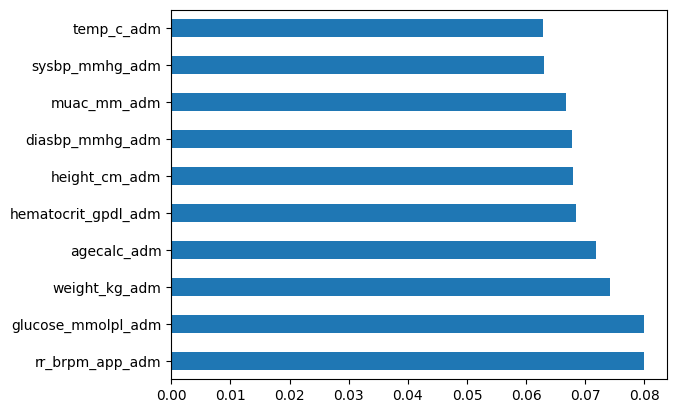

In [ ]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

These sound very important 😊

In [ ]:
print("NaNs in x_train:\n", x_train.isnull().sum())

NaNs in x_train:
 height_cm_adm          0
muac_mm_adm            0
agecalc_adm            0
glucose_mmolpl_adm     0
lengthadm              0
rr_brpm_app_adm        0
weight_kg_adm          0
diasbp_mmhg_adm        0
sqi1_perc_oxi_adm      0
bcsverbal_adm          0
temp_c_adm             0
lactate_mmolpl_adm     0
hematocrit_gpdl_adm    0
bcsmotor_adm           0
sysbp_mmhg_adm         0
agecat                 0
dtype: int64


In [ ]:
print("\nNaNs in x_test:\n", x_test.isnull().sum())


NaNs in x_test:
 height_cm_adm          0
muac_mm_adm            0
agecalc_adm            0
glucose_mmolpl_adm     0
lengthadm              0
rr_brpm_app_adm        0
weight_kg_adm          0
diasbp_mmhg_adm        0
sqi1_perc_oxi_adm      0
bcsverbal_adm          0
temp_c_adm             0
lactate_mmolpl_adm     0
hematocrit_gpdl_adm    0
bcsmotor_adm           0
sysbp_mmhg_adm         0
agecat                 0
dtype: int64


In [ ]:
print("\nNaNs in y_train:", y_train.isnull().sum())


NaNs in y_train: 0


In [ ]:
print("\nNaNs in y_test:", y_test.isnull().sum())


NaNs in y_test: 0


In [ ]:
df.isnull().sum()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9534883720930233

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [ ]:
print(precision)

0.0


In [ ]:
print(recall)

0.0


In [ ]:
print(f1)

0.0


In [ ]:
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.0


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Specificity: 0.9946091644204852


In [ ]:
y_train.shape

(1548,)

In [ ]:
y_train.head()

,inhospital_mortality
2092,0
1833,0
855,1
2323,0
2151,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1935 entries, 0 to 2685
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   height_cm_adm         1935 non-null   float64
 1   muac_mm_adm           1935 non-null   float64
 2   agecalc_adm           1935 non-null   float64
 3   glucose_mmolpl_adm    1935 non-null   float64
 4   lengthadm             1935 non-null   int64  
 5   rr_brpm_app_adm       1935 non-null   float64
 6   weight_kg_adm         1935 non-null   float64
 7   diasbp_mmhg_adm       1935 non-null   float64
 8   sqi1_perc_oxi_adm     1935 non-null   float64
 9   bcsverbal_adm         1935 non-null   int64  
 10  temp_c_adm            1935 non-null   float64
 11  lactate_mmolpl_adm    1935 non-null   float64
 12  hematocrit_gpdl_adm   1935 non-null   int64  
 13  bcsmotor_adm          1935 non-null   int64  
 14  sysbp_mmhg_adm        1935 non-null   float64
 15  inhospital_mortality  1935

In [ ]:
nan_counts = df.isnull().sum()

# Print NaN counts for all columns without truncation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nan_counts)

height_cm_adm           0
muac_mm_adm             0
agecalc_adm             0
glucose_mmolpl_adm      0
lengthadm               0
rr_brpm_app_adm         0
weight_kg_adm           0
diasbp_mmhg_adm         0
sqi1_perc_oxi_adm       0
bcsverbal_adm           0
temp_c_adm              0
lactate_mmolpl_adm      0
hematocrit_gpdl_adm     0
bcsmotor_adm            0
sysbp_mmhg_adm          0
inhospital_mortality    0
agecat                  0
dtype: int64


In [ ]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# ... your existing code ...

# Now you can use roc_auc_score
y_pred_proba = model.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.7690363881401618


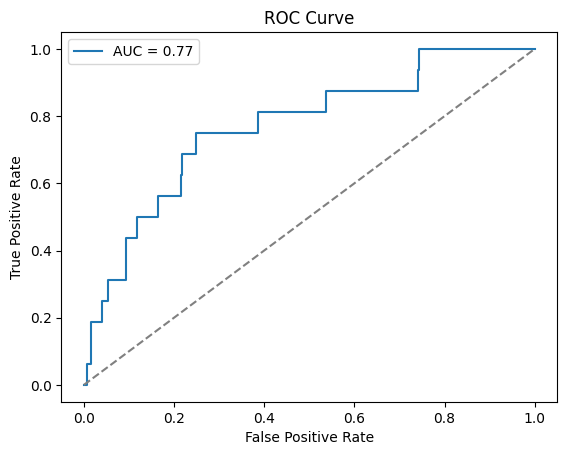

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Selecting features 2